In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

In [2]:
print(os.getcwd())

/Users/luke/Desktop/python_project/GitClone/scientific-computing-archive/optics/LR1


In [3]:
# Reading captured oscilloscope data 
df_p = pd.read_csv('./p-half.csv')
df_s = pd.read_csv('./s-half.csv')

In [4]:
# THEORETICAL WORK

# Declaring constants
n_i = 1 
n_t = 1.5168 # Noted to be glass Bk-7 
a_spd = 10 # deg/s 
conversion = np.pi/180 # conversion constant from deg to rad 
a_spd2 = a_spd*conversion # rad/s

# Creating new columns in dataframe 
df_s['rad'] = df_s[df_s.columns[0]]*a_spd2
df_s['theta_i'] = df_s['rad']
df_s['theta_t'] = np.arcsin((n_i/n_t)*np.sin(df_s['theta_i'])) # Using snell's law to calculate for transmission angle
thetaS_i = df_s['theta_i']
thetaS_t = df_s['theta_t']

df_p['rad'] = df_p[df_p.columns[0]]*a_spd2 
df_p['theta_i'] = df_p['rad']
df_p['theta_t'] = np.arcsin((n_i/n_t)*np.sin(df_p['theta_i'])) # Using snell's law to calculate for transmission angle 
thetaP_i = df_p['theta_i']
thetaP_t = df_p['theta_t']

# Creating new dataframe to store columns for theoretical values 
df_theoryS = pd.DataFrame() 
df_theoryP = pd.DataFrame() 

df_theoryS['rad'] = df_s['rad']
df_theoryP['rad'] = df_p['rad']

# For s-polarized 
df_theoryS['t_s'] = (2*n_i*np.cos(thetaS_i))/(n_i*np.cos(thetaS_i) + n_t*np.cos(thetaS_t))
df_theoryS['T_s'] = ((n_t*np.cos(thetaS_t))/(n_i*np.cos(thetaS_i))) * df_theoryS['t_s']**2 

# For p-polarized 
df_theoryP['t_p'] = (2*n_i*np.cos(thetaP_i))/(n_i*np.cos(thetaP_t) + n_t*np.cos(thetaP_i))
df_theoryP['T_p'] = ((n_t*np.cos(thetaP_t))/(n_i*np.cos(thetaP_i))) * df_theoryP['t_p']**2

#max_expP = 

# plt.plot(df_theoryP['rad'], df_theoryP['T_p'])
# plt.plot(df_theoryS['rad'], df_theoryS['T_s'])
# plt.show()

In [5]:
max_ampP = df_p[df_p.columns[1]].max()
max_theoP = df_theoryP['T_p'].max()
g = max_theoP/max_ampP # fit constant 
df_p[df_p.columns[1]] =df_p[df_p.columns[1]]*g 

max_ampS = df_s[df_s.columns[1]].max()
max_theoS = df_theoryS['T_s'].max()
f = max_theoS/max_ampS 
df_s[df_s.columns[1]] = df_s[df_s.columns[1]]*f

In [6]:
# # Using the peak of transmission as reference point for shifting P-polarized 
# i_expP = df_p[df_p.columns[1]].idxmax()
# i_theoP = df_theoryP['T_p'].idxmax()
# diff = i_theoP - i_expP 
# df_theoryP['rad'] = df_theoryP['rad'].shift(+diff)
# # print(i_expP)
# # print(i_theoP)
# # df_theoryP

# # Using the minimum of transmission as reference point for shifting S-polarized 
# min_ampS = df_s[df_s.columns[1]].min()
# imin_expS = df_s[df_s.columns[1]].idxmin()
# df_sort = df_theoryS.iloc[(df_theoryS['T_s']-min_ampS).abs().argsort()[:1]]
# same_loc = df_sort.index.tolist()
# imin_theoS = same_loc[0]

# print(imin_expS)
# print(imin_theoS)
# diffS = imin_theoS - imin_expS

# print(diffS)
# df_theoryS['rad'] = df_theoryS['rad'].shift(+diffS)

# Finding index of lowest point on experimental measurements 
imin_expP = df_p[df_p.columns[1]].idxmin()
imin_expS = df_s[df_s.columns[1]].idxmin()

# Finding index of 90 degree turn 
point = np.pi/2 
i_90 = df_s[df_s['rad']==point].index.values

print(imin_expP)
print(imin_expS)
diffP = i_90[0] - imin_expP
diffS = i_90[0] - imin_expS

# Shifting experimental curve 
df_p[df_p.columns[1]] = df_p[df_p.columns[1]].shift(+diffP)
df_s[df_s.columns[1]] = df_s[df_s.columns[1]].shift(+diffS)

print(point)



41381
41126
1.5707963267948966


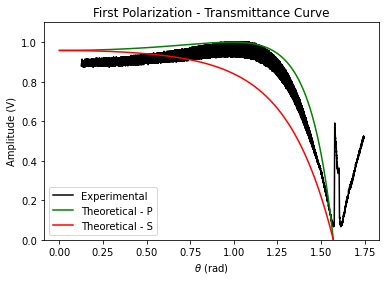

In [7]:
# For p-polarized
plt.plot(df_p[df_p.columns[2]], df_p[df_p.columns[1]], color = 'black', label = 'Experimental') 
plt.plot(df_theoryP['rad'], df_theoryP['T_p'], color = 'green', label = 'Theoretical - P')
plt.plot(df_theoryS['rad'], df_theoryS['T_s'], color = 'red', label = 'Theoretical - S')
plt.ylim([0, 1.1])
# plt.xlim([-0.1, 1.5])
plt.title('First Polarization - Transmittance Curve')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.savefig('p_curve.png')
plt.show()

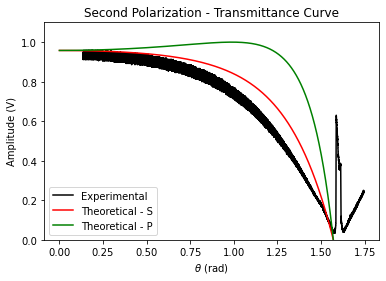

In [8]:
# For s-polarized
plt.plot(df_s[df_s.columns[2]], df_s[df_s.columns[1]], color = 'black', label = 'Experimental')
plt.plot(df_theoryS['rad'], df_theoryS['T_s'], color = 'red', label = 'Theoretical - S')
plt.plot(df_theoryP['rad'], df_theoryP['T_p'], color = 'green', label = 'Theoretical - P')
plt.ylim([0,1.1])
plt.title('Second Polarization - Transmittance Curve')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.savefig('s_curve.png')
plt.show()